# 1. BC 카드 데이터

## Feature 1. MZ 세대는 신혼영유아가구, 1인가구가 많다.

## Insight 1. 신혼영유아가구, 1인가구가 많이 소비하는 품목을 찾아내어 MZ 세대에게 추천하면 좋지 않을까? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc

pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.5f}'.format
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [2]:
bc = pd.read_csv('C:\\data\\fin\\금융보안원_경진대회_데이터(최종제출).csv')
bc.head()

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [3]:
bc_e = bc.copy()

In [4]:
bc_e['연령'] = bc_e['연령'].map(lambda x: 1 if x in ['20세 미만', '20대', '30대'] else 0)

In [5]:
bc_e['성별'].replace({'여성':0, '남성':1}, inplace=True)

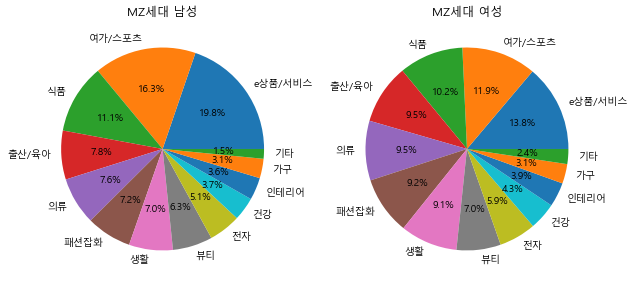

In [6]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(bc_e['품목대분류명'][(bc_e['연령']==1) & (bc_e['성별']==1)].value_counts(), labels=bc_e.품목대분류명.value_counts().index, autopct='%1.1f%%')
ax2.pie(bc_e['품목대분류명'][(bc_e['연령']==1) & (bc_e['성별']==0)].value_counts(), labels=bc_e.품목대분류명.value_counts().index, autopct='%1.1f%%')

ax1.set_title('MZ세대 남성')
ax2.set_title('MZ세대 여성')

plt.show()

### MZ세대 남성은 e상품/서비스가 약 20% 정도 비중으로 크며, 그 다음으로 여가/스포츠 16.3%, 식품 11.1%, 출산/육아 7.8%, 의류 7.6%, 패션잡화 7.2% 순이다.
### MZ세대 여성은 e상품/서비스가 약 13.8% 로, 남성보다 비중이 작으며, 여가/스포츠역시 11.9% 로 남성보다 비중이 작다. 반면, 식품(10.2%), 출산/육아(9.5%), 의류(9.5%), 패션잡화(9.2%), 생활(9.1%) 로, 남성이 e상품/서비스와 여가/스포츠에 치중된대 비해 여성은 식품, 출산/육아, 의류, 패션잡화에 남성보다 더 관심이 많은 것을 알 수 있다.
### 여가/스포츠의 비중도 높다는 사실을 알 수 있다. == 개인을 우선시한다.
### 의식주 중 식품에 소비하는 것에 많은 비중을 둔다는 사실을 알 수 있다.

In [7]:
bc_e.columns

Index(['기준년월', '품목대분류코드', '품목대분류명', '품목중분류코드', '품목중분류명', '성별', '연령', '가구생애주기',
       '고객소재지_광역시도', '고객소재지_시군구', '고객소재지_읍면동', '매출금액', '매출건수'],
      dtype='object')

In [25]:
bc_e['매출금액'][(bc_e['연령']==1) & (bc_e['성별']==1)].mean()

2146056.14297145

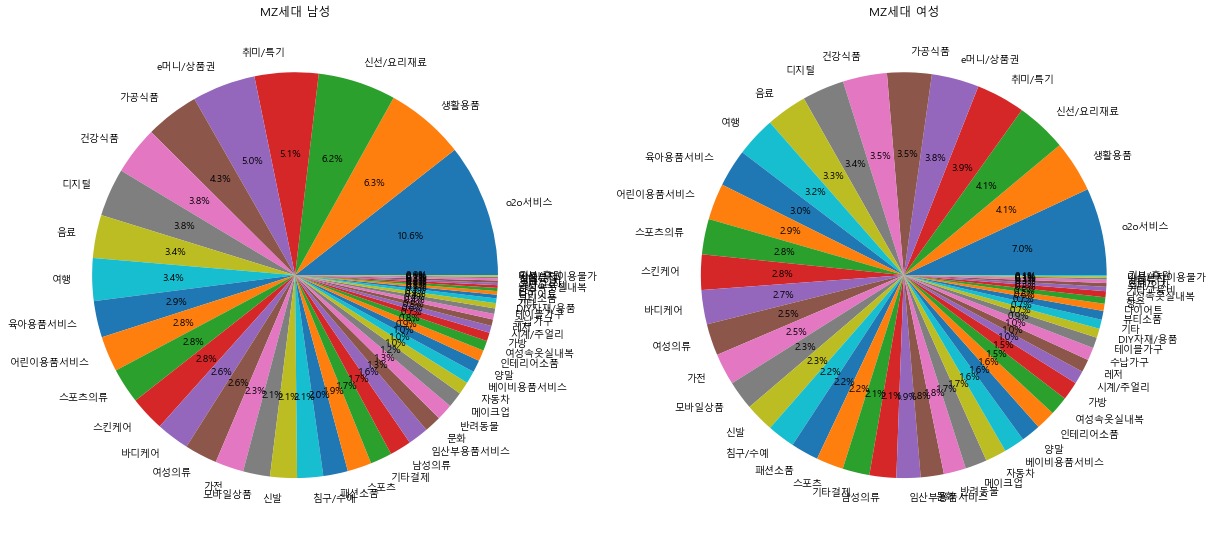

In [26]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(bc_e['품목중분류명'][(bc_e['연령']==1) & (bc_e['성별']==1)].value_counts(), labels=bc_e.품목중분류명.value_counts().index, autopct='%1.1f%%')
ax2.pie(bc_e['품목중분류명'][(bc_e['연령']==1) & (bc_e['성별']==0)].value_counts(), labels=bc_e.품목중분류명.value_counts().index, autopct='%1.1f%%')

ax1.set_title('MZ세대 남성')
ax2.set_title('MZ세대 여성')

plt.show()

### 좀 더 세부적으로 분석한 결과, MZ세대 남성은 여성에 비해 o2o서비스, 생활용품, 신선/요리재료, 취미/특기, e머니/상품권, 가공식품의 비중이 더 높았고, 여성은 o2o 서비스를 제외하면 나머지 세부품목은 눈에띄는 차이는 없었다.

## <span style='color:blue'> -> MZ세대 남성에게 o2o서비스, 생활용품, 신선/요리재료, 취미/특기, e머니/상품권, 가공식품쪽에 혜택이 있는 마케팅을 하면 어떨까? </span>
## <span style='color:blue'> 예를들어, 게임을 좋아하는 MZ세대 남성에게 게임머니를 지급한다던지, 요리재료나 가공식품 광고를 더 띄운다던지 등 </span>

### MZ세대가 많은 신혼영유아가구, 1인가구에서 소비하는 품목은 무엇이 다를까?

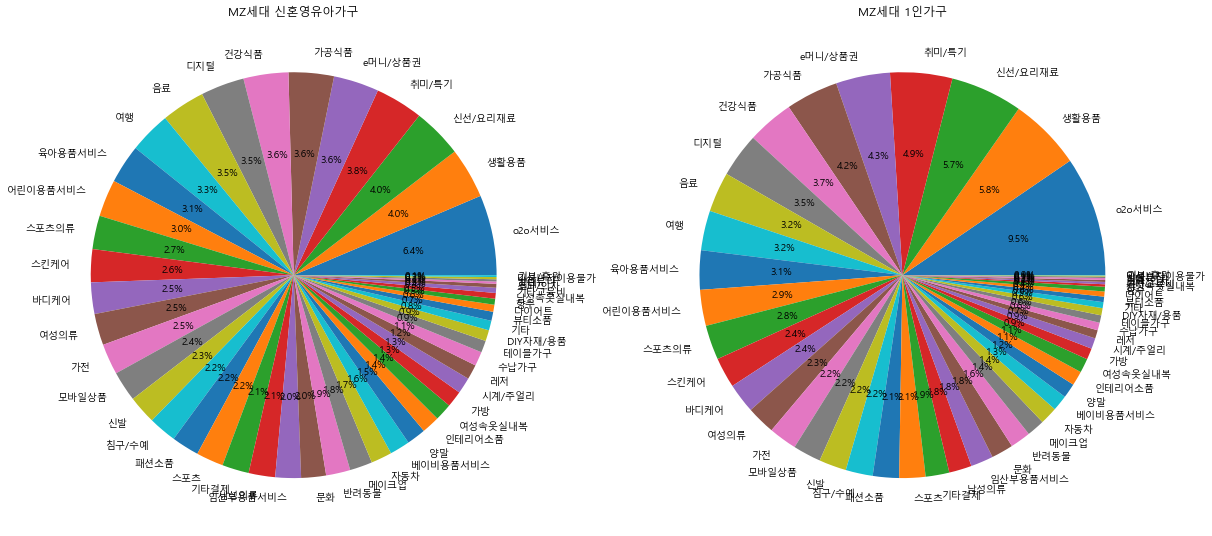

In [19]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(bc_e['품목중분류명'][(bc_e['연령']==1) & (bc_e['가구생애주기']=='신혼영유아가구')].value_counts(), labels=bc_e.품목중분류명.value_counts().index, autopct='%1.1f%%')
ax2.pie(bc_e['품목중분류명'][(bc_e['연령']==1) & (bc_e['가구생애주기']=='1인가구')].value_counts(), labels=bc_e.품목중분류명.value_counts().index, autopct='%1.1f%%')

ax1.set_title('MZ세대 신혼영유아가구')
ax2.set_title('MZ세대 1인가구')

plt.show()

### MZ세대 1인가구는 o2o서비스, 신선/요리재료, 취미/특기, e머니/상품권, 가공식품이 신혼영유아가구에 비해서 비중이 많다.

## <span style='color:blue'> -> 가구생애주기에 따라 소비하는 품목이 다르기 때문에 마케팅 포인트를 달리 잡아야 한다. </span>

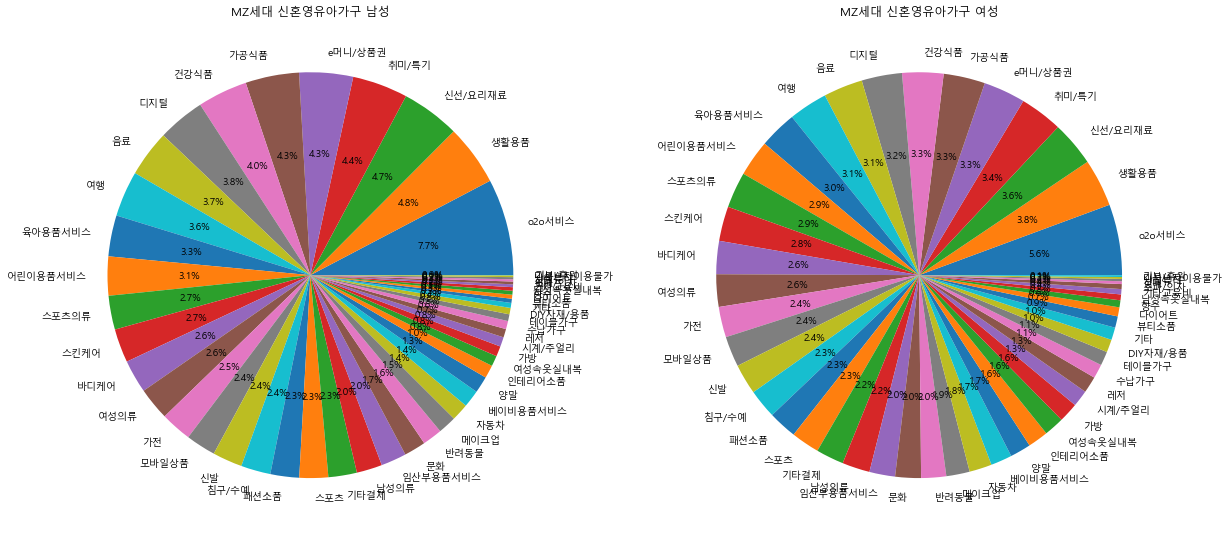

In [23]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(bc_e['품목중분류명'][(bc_e['연령']==1) & (bc_e['가구생애주기']=='신혼영유아가구') & (bc_e['성별']==1)].value_counts(), labels=bc_e.품목중분류명.value_counts().index, autopct='%1.1f%%')
ax2.pie(bc_e['품목중분류명'][(bc_e['연령']==1) & (bc_e['가구생애주기']=='신혼영유아가구') & (bc_e['성별']==0)].value_counts(), labels=bc_e.품목중분류명.value_counts().index, autopct='%1.1f%%')

ax1.set_title('MZ세대 신혼영유아가구 남성')
ax2.set_title('MZ세대 신혼영유아가구 여성')

plt.show()

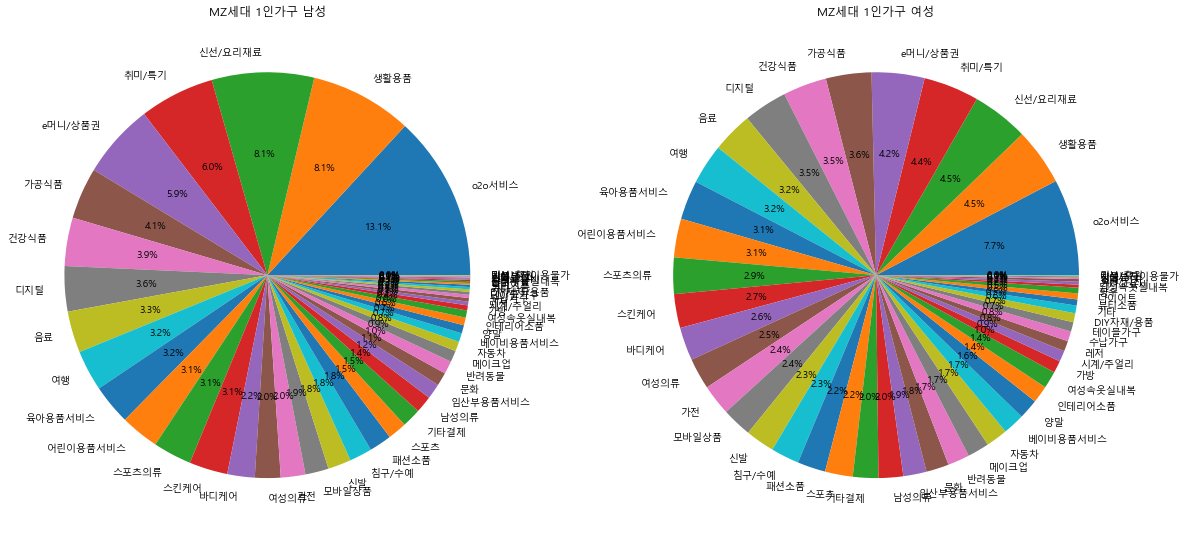

In [22]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(bc_e['품목중분류명'][(bc_e['연령']==1) & (bc_e['가구생애주기']=='1인가구') & (bc_e['성별']==1)].value_counts(), labels=bc_e.품목중분류명.value_counts().index, autopct='%1.1f%%')
ax2.pie(bc_e['품목중분류명'][(bc_e['연령']==1) & (bc_e['가구생애주기']=='1인가구') & (bc_e['성별']==0)].value_counts(), labels=bc_e.품목중분류명.value_counts().index, autopct='%1.1f%%')

ax1.set_title('MZ세대 1인가구 남성')
ax2.set_title('MZ세대 1인가구 여성')

plt.show()

## <span style='color:blue'> -> 구매하는 품목에 확실한 기호가 있는 것은 MZ세대 1인가구 남성이다. 다른 어떤 분류보다 기호가 뚜렷하기에 MZ세대 1인가구 남성에게 o2o서비스, 생활용품, 신선/요리재료, 취미/특기, e머니/상품권 관련 마케팅을 하면 좋은 성과를 얻을 수 있을 것이라 예상된다. </span>

In [72]:
a = []
for key, group in bc_e.groupby(['가구생애주기', '연령'])['매출금액']:
    a.append(key)
print(a)

[('1인가구', 1), ('노인가구', 0), ('성인자녀가구', 0), ('신혼영유아가구', 0), ('신혼영유아가구', 1), ('초중고자녀가구', 0), ('초중고자녀가구', 1)]


In [41]:
bc_e['매출금액'][(bc_e['연령']==1) & (bc_e['가구생애주기']=='1인가구') & (bc_e['성별']==1)].mean()

1694059.2620296695

In [42]:
bc_e['매출금액'][(bc_e['연령']==1) & (bc_e['가구생애주기']=='신혼영유아가구') & (bc_e['성별']==1)].mean()

2558376.5648461347

In [68]:
result = bc_e.groupby(['가구생애주기', '연령'])['매출금액'].mean().reset_index()
result

,가구생애주기,연령,매출금액
0,1인가구,1,1751631.13266
1,노인가구,0,1298556.18359
2,성인자녀가구,0,1688812.99033
3,신혼영유아가구,0,1474771.87906
4,신혼영유아가구,1,2959070.01889
5,초중고자녀가구,0,2704443.16639
6,초중고자녀가구,1,964083.59374


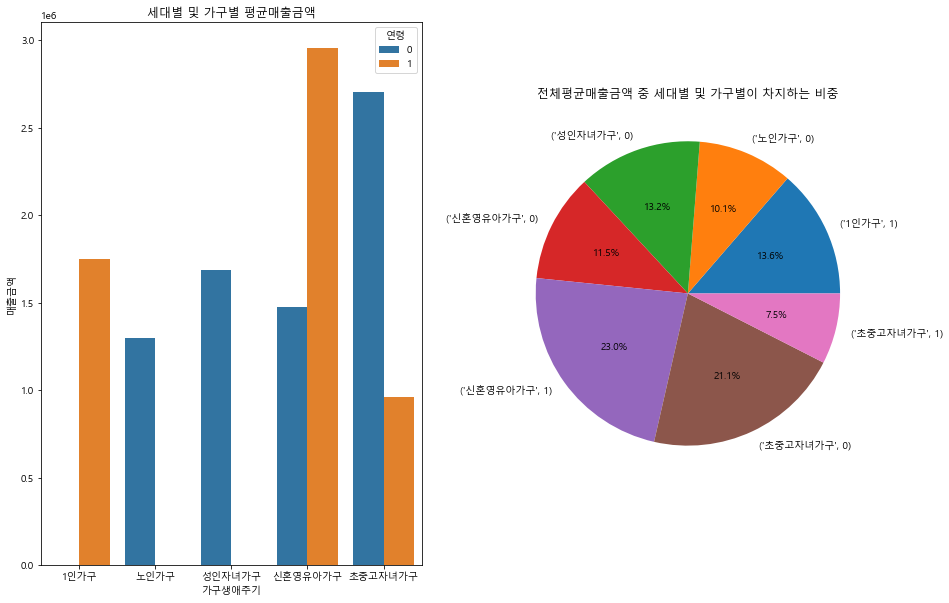

In [133]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.barplot(x='가구생애주기', y='매출금액', hue='연령', data=result, ax=ax1)
ax2.pie(bc_e.groupby(['가구생애주기', '연령'])['매출금액'].mean(), labels=a, autopct='%1.1f%%')

ax1.set_title('세대별 및 가구별 평균매출금액')
ax2.set_title('전체평균매출금액 중 세대별 및 가구별이 차지하는 비중')

plt.show()

### -> MZ 세대 중 신혼영유아가구의 매출금액이 전 세대 통틀어 가장 높다.

In [81]:
bc_e['기준년월'].unique()

array([201903, 201909, 202003, 202009, 202103], dtype=int64)

In [122]:
result2 = bc_e.groupby(['기준년월', '연령', '가구생애주기', '성별'])['매출금액'].mean().reset_index()
result2

,기준년월,연령,가구생애주기,성별,매출금액
0,201903,0,노인가구,0,1726516.52171
1,201903,0,노인가구,1,1805029.30204
2,201903,0,성인자녀가구,0,1986469.29210
3,201903,0,성인자녀가구,1,2014922.75109
4,201903,0,신혼영유아가구,0,1951616.45770
...,...,...,...,...,...
65,202103,1,1인가구,1,1671424.32362
66,202103,1,신혼영유아가구,0,3223768.33898
67,202103,1,신혼영유아가구,1,2483909.93670
68,202103,1,초중고자녀가구,0,958776.21347


In [130]:
df1 = result2['매출금액'] [(result2['가구생애주기']=='1인가구') & (result2['성별']==1)]
df2 = result2['매출금액'] [(result2['가구생애주기']=='1인가구') & (result2['성별']==0)]
df3 = result2['매출금액'] [(result2['가구생애주기']=='신혼영유아가구') & (result2['성별']==1) & (result2['연령']==1)]
df4 = result2['매출금액'] [(result2['가구생애주기']=='신혼영유아가구') & (result2['성별']==0) & (result2['연령']==1)]
df5 = result2['매출금액'] [(result2['가구생애주기']=='신혼영유아가구') & (result2['성별']==1) & (result2['연령']==0)]
df6 = result2['매출금액'] [(result2['가구생애주기']=='신혼영유아가구') & (result2['성별']==0) & (result2['연령']==0)]

In [131]:
result2['기준년월'].unique()

array([201903, 201909, 202003, 202009, 202103], dtype=int64)

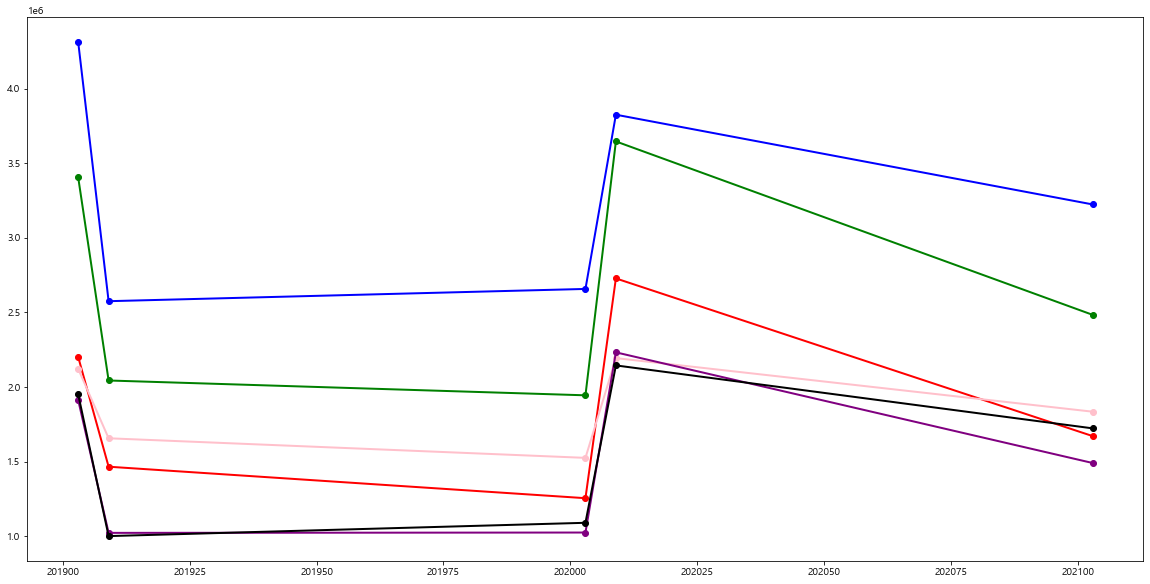

In [132]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

ax.plot(result2['기준년월'].unique(), df1, marker='o', color='red', linewidth=2)
ax.plot(result2['기준년월'].unique(), df2, marker='o', color='pink', linewidth=2)
ax.plot(result2['기준년월'].unique(), df3, marker='o', color='green', linewidth=2)
ax.plot(result2['기준년월'].unique(), df4, marker='o', color='blue', linewidth=2)
ax.plot(result2['기준년월'].unique(), df5, marker='o', color='purple', linewidth=2)
ax.plot(result2['기준년월'].unique(), df6, marker='o', color='black', linewidth=2)
plt.show()

### green(MZ세대/신혼영유아가구/남성) 과 red(MZ세대/1인가구/남성) 만이 코로나 이전보다 이후가 더 높았다. -> 상대적으로 코로나로 인한 소비금액 영향이 적다.
### -> 따라서, MZ세대 중 남성이 구매력이 더 높기 때문에 마케팅을 더 잘하면 매출증대에 좋다?

--------------- 세대 별 평균 매출금액 -----------------

      매출금액
0 2022031.20486

1 2358608.10670
-----------------------------------------------------

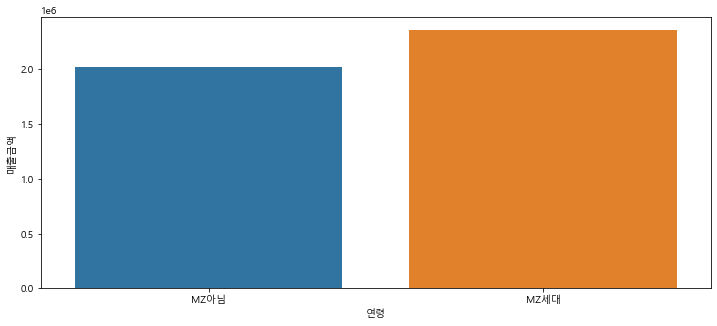

--------------- 연령 비율 -----------------
      
      매출건수
0 40.07890

1 58.03757
------------------------------------------

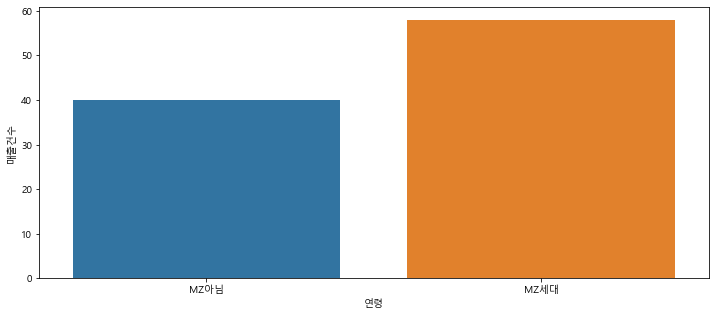

### 의외로 MZ 세대가 MZ 아닌 세대보다 평균매출금액(카드사용금액?)이 더 크다.
### 평균매출건수 역시 MZ 세대가 MZ 아닌 세대보다 더 많다.

## <span style='color:blue'> -> 즉, MZ 세대는 평균 카드 사용건수와 평균 사용금액이 다른세대에 비해 많기 때문에, MZ 세대의 마음을 잡는 것이 관건이다. </span>

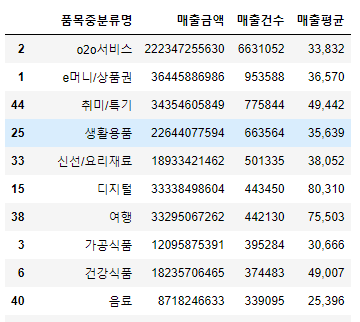

## <span style='color:blue'> ⇒ mz 세대의 경우 미혼인 1인 가구의 비중이 가장 많은 것으로 드러났다. </span>
## <span style='color:blue'>ex) 모바일 상품권 이벤트의 경우 1인 가구 대상 모바일 교환권으로 + 1인이 할 수 있는 스포츠(헬스장 이용권 및 골프연습장 일일이용권) </span>

bc_mz_small1 = bc_mz.groupby('품목중분류명')['매출금액','매출건수'].sum().reset_index()
bc_mz_small2 = bc_mz.groupby('품목중분류명')['매출평균'].mean().reset_index()

bc_mz_small = pd.merge(bc_mz_small1,bc_mz_small2)

bc_mz_small.sort_values(by=['매출건수','매출금액','매출평균'],ascending=False)

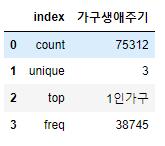

A2-2.

e상품 및 서비스는 주로 o2o 서비스를 이용한다**(생활밀착 플랫폼)**
e머니/상품권에 많은 소비를 한다. (현금보다는 모바일(온라인) 결제를 위주로)
⇒ 온라인 플랫폼을 이용하는 MZ 세대의 유저의 경우 e머니 추가 적립이나 상품권 구입 유도를 통해 고객을 유치할 수 있다.

대분류에서 여가/스포츠에 해당되는 취미/특기 가 높은 결과를 보였다.
⇒ mz 세대의 경우 취미나 특기로 스포츠 활동을 주로 한다고 예측해볼 수 있다. (ex : 골린이, 근손실)

⇒ 여가/스포츠의 경우 대분류에서 2번째로 높은 수치를 보였으나 기존 여가에 해당되었던 여행의 경우 중분류에서 코로나19의 영향으로 인해 낮은 결과값을 보였다.

## <span style='color:blue'> cf) e머니/상품권 및 o2o서비스 그리고 취미/특기 분류명에서 주로 구매한 mz세대들의 가구생애주기는? </span>

bc_mz['가구생애주기'][(bc['품목중분류명'] =='e머니/상품권') | (bc['품목중분류명'] == 'o2o서비스')
                | (bc['품목중분류명'] == '취미/특기')].describe().transpose().reset_index()

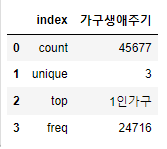

## <span style='color:blue'> ⇒ 이 역시 1인가구 비중이 가장 큰 것으로 나타났다. </span>

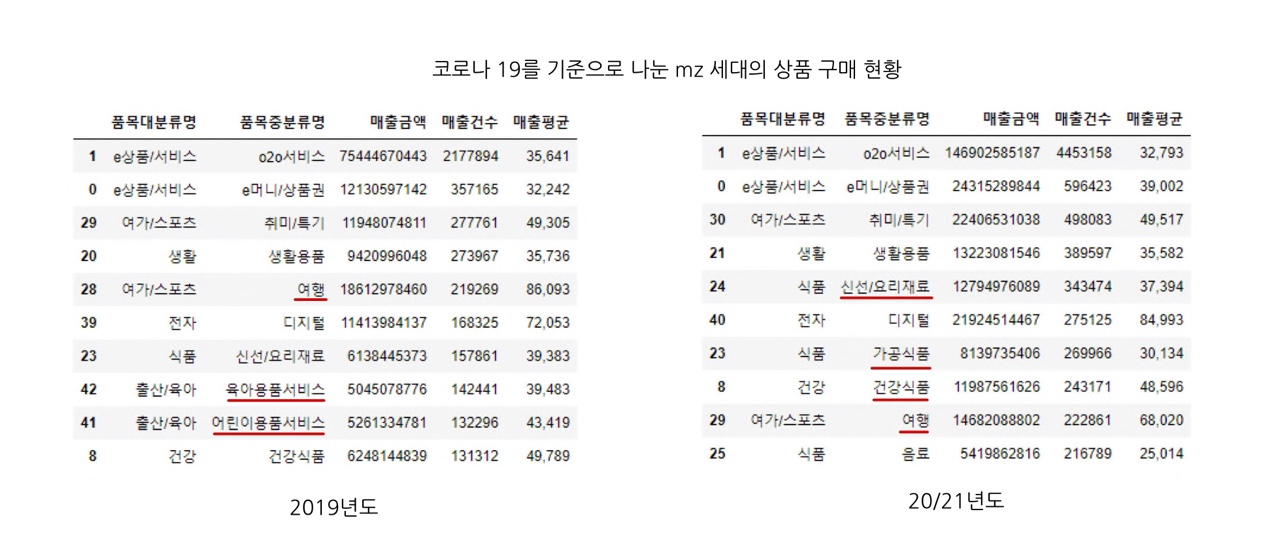

## <span style='color:blue'> 코로나시대에 MZ세대에게 어필하는 방법은 아래와 같다. </span>
여행 관련 상품의 경우 코로나 이전에 비해 매출 금액이 급감하였다.
육아 및 어린이용품 관련 상품의 경우 코로나 19 이후 저출산의 영향을 더욱더 받아 전체 순위 10위권 바깥으로 밀려났다.
코로나 19 이후로 신선/요리재료, 가공식품, 건강식품과 같이 음식 및 건강에 사람들의 관심사가 높아졌다. ★
→ 시계열 그래프 및 막대그래프 그리는 방법 추가적으로 해볼 것